# 분류(Classification) - 확률적 판별 모형 

## 로지스틱회귀(Logistic Regression)

In [1]:
# 패키지 임포트 
import os 
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning) 

import pandas as pd # pandas package
import numpy as np  # numpy package  
from scipy import stats  # Scipy Package 

from sklearn import datasets # sklearn dataset 
from sklearn.model_selection import train_test_split #데이터셋 분리 

# 시각화 패키지 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

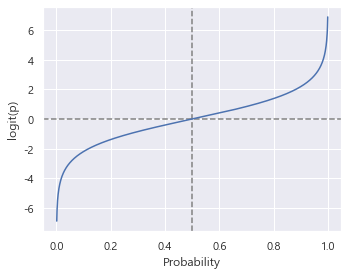

In [2]:
## 로짓 펑션 시각화 
p = np.arange(0.001, 1, 0.001)

logit_df = pd.DataFrame({
    'p': p,
    'logit': np.log(p / (1 - p)),
    'odds': p / (1 - p),
})

fig, ax = plt.subplots(figsize=(5, 4))
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.5, color='grey', linestyle='--')
ax.plot(logit_df['p'], logit_df['logit'])
ax.set_xlabel('Probability')
ax.set_ylabel('logit(p)')

plt.tight_layout()
plt.show()


In [3]:
p

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
       0.127, 0.128,

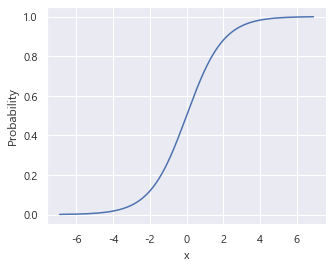

In [4]:
## logistic function = sigmoid 
x = logit_df['logit']
phi = 1 / (1 + np.exp(-x)) # x:판별함수 
plt.figure(figsize=(5,4))

plt.plot(x, phi)
plt.xlabel('x')
plt.ylabel('Probability')

plt.show()

In [5]:
# 사례 결과 확인 
phi = 1 / (1 + np.exp(-2))
print(phi)

0.8807970779778823


## 이항 로지스틱 회귀 

### 위스콘신 유방암(breast cancer) 데이터 셋 
- 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지를 판별
- 30개의 속성과 malignant(악성:0), benign(양성1)의 두가지 타겟 데이터로 구성 : 총 31개 
- radius(반경)
- texture(질감)
- perimeter(둘레)
- area(면적)
- smoothness(매끄러움)
- compactness(작은 적도)
- concavity(오목함)
- concave_points(오목한 점의 수)
- symmetry(대칭)
- fractal_dimension(프랙탈 차원)
- 위 10개 세포의 특성 항목에 대해 각각평균(mean), 표준오차(error), 큰 값 3개의 평균(worst) 값을 속성으로 구성 

In [6]:
## 데이터 셋 로드 
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data.data

# 종양: target data 
# 악성(malignant:0), 양성(benign:1)
b_target_data = data.target

# 종양 구분 
tumar = data.target_names

# 속성 명칭 
feature_names = data.feature_names

print('종양 여부 결정 속성 : {}'.format(feature_names))
print('종양 구분 : {}'.format(tumar))

breast_df = pd.DataFrame(b_input_data, columns=feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_"달기 
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

종양 여부 결정 속성 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
종양 구분 : ['malignant' 'benign']


In [7]:
breast_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
## 데이터 확인 
# 데이터 차원 
print(breast_df.shape)
# label 데이터 비율 확인 
breast_df['target'].value_counts()

(569, 31)


1    357
0    212
Name: target, dtype: int64

In [9]:
breast_df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

In [10]:
## 학습 데이터 셋 생성 
# 평균관련 된 3개의 속성으로 종양 여부 판단 
X = breast_df[['mean_radius', 'mean_texture', 'mean_perimeter' ]] # 독립변수 

Y = breast_df['target']

# 80%의 데이터를 학습 데이터로, 20%를 테스트 데이터 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

## 표준화 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)

##  Logistic Regression
### from sklearn.linear_model import LogisticRegression
#### 파라미터
- penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2
- dual : 이중 또는 초기 공식
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- random_state : 난수 seed 설정
- solver : 최적화 문제에 사용하는 알고리즘
- max_iter : 계산에 사용할 작업 수
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- verbose : 동작 과정에 대한 출력 메시지
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용)

#### 속성 
- classes_ : 클래스 
- coef_ : 회귀 계수 
- intercept_ : 절편 

In [11]:
train_scaled[:5]

array([[-1.44075296, -0.43531947, -1.36208497],
       [ 1.97409619,  1.73302577,  2.09167167],
       [-1.39998202, -1.24962228, -1.34520926],
       [-0.98179678,  1.41622208, -0.98258746],
       [-1.11769991, -1.0102595 , -1.12500192]])

In [12]:
from sklearn.linear_model import LogisticRegression

## 반복횟수(max_iter)를 100으로 지정한 로지스틱 회귀모델 
lr = LogisticRegression(max_iter=100)

lr.fit(train_scaled, y_train)

# #테스트 데이터 정확도 확인 
# 결과 확인
print("test 데이터셋 정확도", lr.score(test_scaled, y_test))

test 데이터셋 정확도 0.9122807017543859


In [13]:
## 회귀 계수 확인 
print("coefficient = \n", lr.coef_)
print()
print("intercept = ", lr.intercept_)

coefficient = 
 [[-0.52514614 -0.90583641 -2.86050966]]

intercept =  [0.71500109]


In [14]:
## 테스트 데이터 각 클래스별 확률 확인 
# 어떤 클래스 있는 확인 
print("Class :", lr.classes_)

# 테스트 데이터  
print("테스트 데이터 :\n", test_scaled[:5])

# 테스트 데이터의 각 클래스 확률 확인 
print("테스트 데이터의 각 클래스 확률 :\n",lr.predict_proba(test_scaled[:5]))

## 테스트 데이터 예측 결과 
Y_pred = lr.predict(test_scaled[:5])
print("예측 결과 :", Y_pred)

Class : [0 1]
테스트 데이터 :
 [[-0.4877952  -0.25088379 -0.46378664]
 [ 1.37325734  0.36318719  1.29254295]
 [ 0.37225845 -0.05148067  0.38772954]
 [-0.50793023 -0.4593507  -0.44808668]
 [-0.75530352 -1.19351674 -0.72985962]]
테스트 데이터의 각 클래스 확률 :
 [[0.07411784 0.92588216]
 [0.98257857 0.01742143]
 [0.63250073 0.36749927]
 [0.06418841 0.93581159]
 [0.01364629 0.98635371]]
예측 결과 : [1 0 0 1 1]


In [15]:
## 판별 함수(decision_function)로 z 값 산출 
# 테스트 데이터 확인  
print("테스트 데이터 :\n", test_scaled[:5])

# 이진분류의 decision_function은 1 클래스(양성)에 대응하는 값을 반환
decision = lr.decision_function(test_scaled[:5])
print()
print("decision_function = ", np.round(decision[:5], decimals=2))
print()
# 로지스틱 함수 양성(1) 클래스의 확률)
phi = 1 / (1 + np.exp(-decision))

# 로지스틱 함수 악성(0) 클래스의 확률)
n_phi = 1 - (phi)

print("클래스1 확률: ", phi)
print("클래스0 확률: ", n_phi)

테스트 데이터 :
 [[-0.4877952  -0.25088379 -0.46378664]
 [ 1.37325734  0.36318719  1.29254295]
 [ 0.37225845 -0.05148067  0.38772954]
 [-0.50793023 -0.4593507  -0.44808668]
 [-0.75530352 -1.19351674 -0.72985962]]

decision_function =  [ 2.53 -4.03 -0.54  2.68  4.28]

클래스1 확률:  [0.92588216 0.01742143 0.36749927 0.93581159 0.98635371]
클래스0 확률:  [0.07411784 0.98257857 0.63250073 0.06418841 0.01364629]


In [16]:
## 판별 함수 직접 계산 

# 테스트 셋 : [-0.4877952  -0.25088379 -0.46378664]
z = (lr.coef_[0][0]*test_scaled[0][0]  + lr.coef_[0][1]*test_scaled[0][1] + 
     lr.coef_[0][2]*test_scaled[0][2]  + lr.intercept_[0])
print("판별함수 계산 : ", z)

z = -0.52514614*-0.4877952 + -0.90583641*-0.25088379 +  -2.86050966 * -0.46378664 + 0.71500109
print("판별함수 계산 : ", z)

판별함수 계산 :  2.525090684050562
판별함수 계산 :  2.5250906919502643


In [17]:
## 모델 평가
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 예측값 
Y_pred = lr.predict(test_scaled)

# 성능 리포트 출력 
print(classification_report(y_test, lr.predict(test_scaled)))
# 주요 성능 지표 
print() 
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114


confusion matrix = 
 [[36  7]
 [ 3 68]]
accuracy =  0.9122807017543859
precision =  0.9066666666666666
recall =  0.9577464788732394
f1 score =  0.9315068493150686


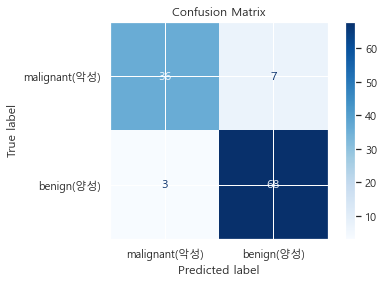

In [18]:
## 시각화 
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

labels = ['malignant(악성)',  'benign(양성)']
disp = plot_confusion_matrix(lr, test_scaled, y_test,
                             display_labels=labels, 
                             cmap=plt.cm.Blues, 
                             normalize=None)

disp.ax_.set_title('Confusion Matrix');

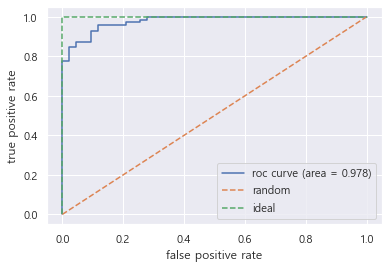

auc =  0.9780543727481166


In [19]:
## ROC Curve 
from sklearn.metrics import roc_curve, auc, roc_auc_score

# 검증 데이터가 클래스 1에 해당 하는 데이터 
Y_score = lr.predict_proba(test_scaled)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

# AUC Score 
print('auc = ', roc_auc_score(y_true=y_test, y_score=Y_score))

## statsmodel 이용한 Logistic Regression
- Logit() : Logit Model
- 데이터의 class가 0,1 인 경우만 사용 가능 

In [20]:
## 로지스틱 모형 적합,  y = F(x)
import statsmodels.api as sm

# 상수항 추가 
X = sm.add_constant(train_scaled) 

model_s = sm.Logit(y_train, X)

results = model_s.fit()

Optimization terminated successfully.
         Current function value: 0.204880
         Iterations 9


In [21]:
## 결과 리포트 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Jul 2022   Pseudo R-squ.:                  0.6894
Time:                        12:36:17   Log-Likelihood:                -93.220
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                 2.162e-89
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6412      0.194      3.308      0.001       0.261       1.021
x1            20.1777      3.706      5.445      0.000      12.914      27.441
x2            -1.0736      0.208     -5.162      0.000      -1.481      -0.666
x3           -24.4741      3.954     -6.190      0.000     -32.223     -16.725
==============================================================================
"""

In [22]:
# 로지스틱의 log형태가 취해진 결과
results.params

const     0.641210
x1       20.177741
x2       -1.073557
x3      -24.474142
dtype: float64

In [23]:
# 시그모이드 
np.exp(results.params)

const    1.898777e+00
x1       5.795377e+08
x2       3.417905e-01
x3       2.349715e-11
dtype: float64

In [24]:
# 삭제 
# results.predict(X[:5])

In [25]:
## 5개 테스트 셋 예측 
test_scaled[:5]

array([[-0.4877952 , -0.25088379, -0.46378664],
       [ 1.37325734,  0.36318719,  1.29254295],
       [ 0.37225845, -0.05148067,  0.38772954],
       [-0.50793023, -0.4593507 , -0.44808668],
       [-0.75530352, -1.19351674, -0.72985962]])

In [26]:
# 상수항 추가 
X_test = sm.add_constant(test_scaled) 

In [27]:
# 예측 (클래스 1일 확률 )
results.predict(X_test[:5])

array([0.9182439 , 0.02476274, 0.21728888, 0.8643619 , 0.98949026])

## 다항 로지스틱 회귀

In [28]:
## iris 데이터셋 로드 
data = datasets.load_iris()

# 꽃의 특징 (input data)
t_input_data = data['data'] 

#꽃 종류를 수치로 나탄내 것 (0 ~ 2) (target data)
target_data = data['target'] 

# 꽃 종류를 이름으로 나타낸 것
flowers = data['target_names'] 

# 꽃 특징들의 명칭
feature_names = data['feature_names'] 

#sepal : 꽃받침, #petal : 꽃잎
print('꽃을 결정짓는 특징 : {}'.format(feature_names))
print('꽃 종류 : {}'.format(flowers))

iris_df = pd.DataFrame(t_input_data, columns=feature_names)
iris_df['species'] = target_data

#맨 위에 있는 데이터 10개 출력
iris_df.head(5)

꽃을 결정짓는 특징 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃 종류 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
#데이터의 기술 통계 정보 출력
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


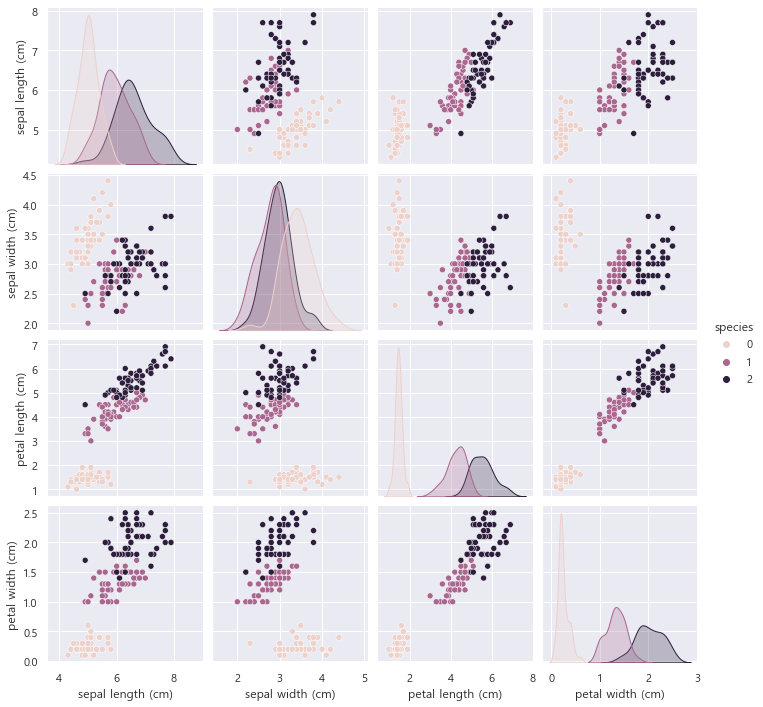

In [30]:
#데이터 시각화, 산점도 행렬 
sns.pairplot(iris_df, hue='species', vars=feature_names)
plt.show()

In [31]:
# input_data

In [32]:
## 데이터 전처리 
## 훈련 데이터와 테스트 데이터 분리
# 입력은 'sepal length (cm)', 'sepal width (cm)' 2개 변수만 사용 
input_data = t_input_data[:,:2] # 독립변수, 주석 처리 할 경우 4개 독립변수 사용  
train_input, test_input, train_target, test_target = train_test_split(
    input_data, target_data, test_size=0.1, random_state=1)

# 표준점수로 데이터 스케일링 
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

print(train_scaled.shape, train_target.shape, test_scaled.shape, test_target.shape)

(135, 2) (135,) (15, 2) (15,)


In [33]:
test_scaled[:5]

array([[-0.02086014,  2.28989674],
       [-0.87793962, -1.25253328],
       [ 0.95865928, -0.07172327],
       [-0.51061984,  2.05373474],
       [ 2.55037832,  1.81757274]])

In [34]:
## 반복횟수(max_iter)를 1000으로 지정한 로지스틱 회귀모델
Dlr = LogisticRegression(max_iter=100)

#로지스틱 회귀 학습
Dlr.fit(train_scaled, train_target)

#테스트 데이터 
print(test_scaled[:5])

#테스트 데이터 예측 확률 
pred = Dlr.predict_proba(test_scaled[:5])
print(pred)

#테스트 데이터 예측
pred = Dlr.predict(test_scaled[:5])
print(pred)

# 결과 확인
print("test 데이터셋 정확도", Dlr.score(test_scaled, test_target))

[[-0.02086014  2.28989674]
 [-0.87793962 -1.25253328]
 [ 0.95865928 -0.07172327]
 [-0.51061984  2.05373474]
 [ 2.55037832  1.81757274]]
[[9.33038861e-01 2.35032056e-02 4.34579331e-02]
 [1.26883851e-01 7.56846611e-01 1.16269538e-01]
 [2.24144158e-03 3.19944462e-01 6.77814097e-01]
 [9.82762992e-01 8.84177318e-03 8.39523505e-03]
 [1.08899921e-04 3.25884358e-02 9.67302664e-01]]
[0 1 2 0 2]
test 데이터셋 정확도 0.8


In [35]:
## 로지스틱 회귀 모델의 가중치와 절편
#다중 분류 가중치와 절편을 출력하면, 각 클래스마다의 가중치 절편을 출력 

print(Dlr.coef_,"\n")
print(Dlr.intercept_)

[[-2.53394973  1.40787349]
 [ 0.68838616 -0.91510719]
 [ 1.84556358 -0.4927663 ]] 

[-1.0274223   0.67787193  0.34955036]


In [36]:
## 결정 함수(decision_function)로 z1 ~ z3의 값 산출 
Dlr_decision = Dlr.decision_function(test_scaled[:5])
print(np.round(Dlr_decision, decimals=2))

## 결정함수 직접 계산 
# sesota 클래스 1개 값 계산 
setosa_z1 = (-2.53394973 * -0.02086014) + (1.40787349 * 2.28989674)  -1.0274223
print(setosa_z1)

# sesota 클래스 5개 값 계산 
setosa_z1 = (-2.53394973 * test_scaled[:5][:,0]) + (1.40787349 * test_scaled[:5][:,1])  -1.0274223
print(setosa_z1)

## sesota 클래스 5개의 확률 
print(Dlr.predict_proba(test_scaled[:5]) [:5][:,0])

[[ 2.25 -1.43 -0.82]
 [-0.57  1.22 -0.65]
 [-3.56  1.4   2.15]
 [ 3.16 -1.55 -1.6 ]
 [-4.93  0.77  4.16]]
2.249321161204185
[ 2.24932115 -0.56617584 -3.55759401  3.15786141 -4.93104029]
[9.33038861e-01 1.26883851e-01 2.24144158e-03 9.82762992e-01
 1.08899921e-04]


In [37]:
#소프트맥스 함수를 사용한 각 클래스들의 확률
# 클래스 세가지 이상이인 경우 소프트맥스 (Softmax) 함수를 사용하여 확률 도출 
from scipy.special import softmax

proba = softmax(Dlr_decision, axis=1)
print(np.round(proba, decimals=3))

[[0.933 0.024 0.043]
 [0.127 0.757 0.116]
 [0.002 0.32  0.678]
 [0.983 0.009 0.008]
 [0.    0.033 0.967]]


In [38]:
## 테스트 데이터 예측
Y_pred = Dlr.predict(test_scaled)
print(Y_pred)

test_scaled

[0 1 2 0 2 2 2 0 0 2 1 0 2 2 1]


array([[-0.02086014,  2.28989674],
       [-0.87793962, -1.25253328],
       [ 0.95865928, -0.07172327],
       [-0.51061984,  2.05373474],
       [ 2.55037832,  1.81757274],
       [ 0.5913395 ,  0.63676273],
       [ 1.32597906,  0.16443873],
       [-0.87793962,  1.81757274],
       [-1.36769933,  0.40060073],
       [ 1.32597906,  0.40060073],
       [-0.26573999, -0.78020928],
       [-0.51061984,  2.05373474],
       [ 1.57085891, -0.07172327],
       [ 0.71377942,  0.40060073],
       [ 0.22401972, -0.30788528]])

[[5 0 0]
 [0 3 3]
 [0 0 4]]


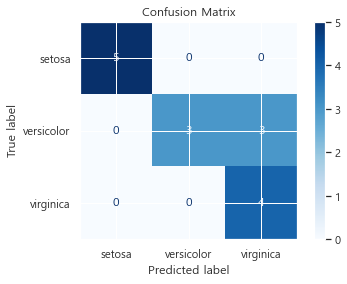

In [39]:
## 혼동 행렬 
print(confusion_matrix(test_target, Y_pred))

labels = ['setosa', 'versicolor', 'virginica']

disp = plot_confusion_matrix(Dlr, test_scaled, test_target,
                             display_labels=labels, 
                             cmap=plt.cm.Blues, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

In [43]:
#성능 리포트 출력 
print(classification_report(test_target, Y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score

print() 
print('confusion matrix = \n', confusion_matrix(y_true=test_target, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=test_target, y_pred=Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.50      0.67         6
           2       0.57      1.00      0.73         4

    accuracy                           0.80        15
   macro avg       0.86      0.83      0.80        15
weighted avg       0.89      0.80      0.79        15


confusion matrix = 
 [[5 0 0]
 [0 3 3]
 [0 0 4]]
accuracy =  0.8
